# [ICTCOG AI Academy] 7기 고급시각저녁반
# Object Detection (5) - One Stage 기법 (2)
- 2 stages: localization -> classification
  - R-CNN
  - SPPnet
  - Fast R-CNN
  - Faster R-CNN
- 1 stage : localization <-> classification
  - YOLO 2015-16

### YOLO
- You Only Look Once(YOLO)
    - 사람은 한번만 보고 인식
- 빠른 속도
- end-to-end training
- localization & classification 동시에함
- YOLO 1,2,3  제작에 참여
    - 학습 툴도 제공
      - 쉽게 적용 가능
      - Fast R-CNN 저자도 참여
- 정확도는 낮지만 속도는 Faster R-CNN 보다 6배 빠름
  - 실시간 탐지에 적합
- 논문, PPT 참고 :https://pjreddie.com/

#### 핵심
-  splitting the image into grid (이미지를 쪼갬)
- confidences : P(object)
  - 각 물체가 있을 확률 X IoU(Intersection over Union)
  > - 조건부 확률  eg. P(Car|Object) : 어떤 객체가 차일 확률
  - vectorization으로 한번에 계산
- selective search 처럼 직사각 형태의 여러 후보군을 생성
  - 각 grid 마다 Confidences 가 큰 값만 남김
  - 구열별로 어떤 객체 클래스 인지 
- Googlenet에 영감을 받았지만 Inception 없이 fine tuning

#### You Only Look Once: Unified, Real-Time Object Detection
- 간단하고 직관적인 구조
  - 이미지를 448 x448
  - 하나의 convolutional network
  - NMS (Non-Maximum Suppression)
    - 각 계산한 B-BOX 확률
    - 확률 크기가 최대인 값과 0아닌 다른 값의 IoU가 0.5보다 큰 경우 후자를 0 으로 만듦 - 하나의 convolutional network
      - NMS (Non-Maximum Suppression)
          - 각  B-BOX에서의 클래스 확률
            - 확률 크기가 최대인 값과 0아닌 다른 값의 IoU가 0.5보다 큰 경우 후자를 0 으로 만들고 작으면 지나감
              - 이후 다음값으로 위의 과정을 반복 - 하나의 convolutional network

#### 한계점
- 엄격한 공간적 제한
- 데이터가 작으면 학습에 한계
- imbalanced dataset
  - pooling 을 많이 하면서 downsampling 으로 인한 coarse features 
- localization 문제 : 작은 객체는 탐지를 잘 못함



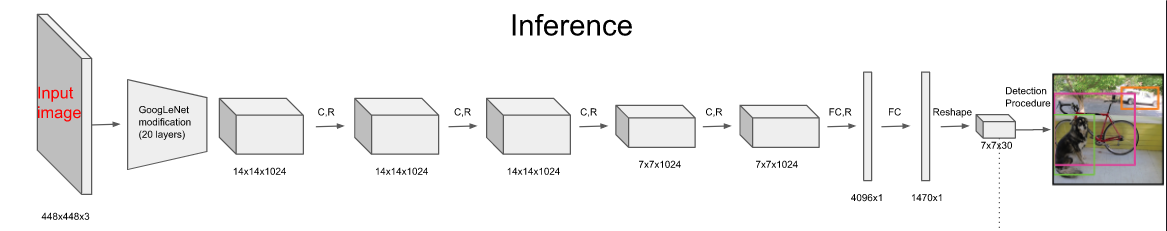

참고:https://docs.google.com/presentation/d/1aeRvtKG21KHdD5lg6Hgyhx5rPq_ZOsGjG5rJ1HP7BbA/pub?start=false&loop=false&delayms=3000&slide=id.p


In [ ]:
import tensorflow as tf

In [ ]:
dir(tf.image)

['ResizeMethod',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'adjust_brightness',
 'adjust_contrast',
 'adjust_gamma',
 'adjust_hue',
 'adjust_jpeg_quality',
 'adjust_saturation',
 'central_crop',
 'combined_non_max_suppression',
 'convert_image_dtype',
 'crop_and_resize',
 'crop_to_bounding_box',
 'decode_and_crop_jpeg',
 'decode_bmp',
 'decode_gif',
 'decode_image',
 'decode_jpeg',
 'decode_png',
 'draw_bounding_boxes',
 'encode_jpeg',
 'encode_png',
 'extract_glimpse',
 'extract_jpeg_shape',
 'extract_patches',
 'flip_left_right',
 'flip_up_down',
 'generate_bounding_box_proposals',
 'grayscale_to_rgb',
 'hsv_to_rgb',
 'image_gradients',
 'is_jpeg',
 'non_max_suppression',
 'non_max_suppression_overlaps',
 'non_max_suppression_padded',
 'non_max_suppression_with_scores',
 'pad_to_bounding_box',
 'per_image_standardization',
 'psnr',
 'random_brightness',
 'random_contrast',
 'random_crop',
 

In [ ]:
import numpy as np

In [ ]:
x=np.array([1,2,3,3,7,4,2])

In [ ]:
np.argmax(x) # 4번째에 최대값

4

In [ ]:
np.max(x)   #최대값 7

7

- yolo3 git : https://github.com/qqwweee/keras-yolo3

### Metrics
- Regression : MSPE, MSAE, R squared
- classification
  - confusion matrix (혼돈 행렬) 이용
    - 2종 오류 False Negative: 실제 positive 이지만 negative로 예측 
    - 1종 오류 False Positive: 실제 negative 이지만 positive로 예측  
      - 문제 사항에 따라서 척도 상이함

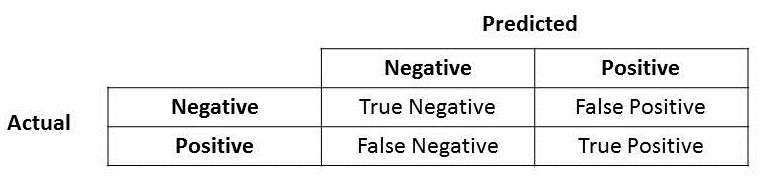

- accuracy(정확도), recall(재현율), Specificity, Precision(정밀도), F1 Score, type 1 Error, Type 2 Error  
- confidence score  이미지 내에 사물이 존재할 가능성

  - $Accuray = \frac{TP+TN}{TP+TN+FP+FN} $
  - $recall = \frac{TP}{TP+FN} $
  - $Precision = \frac{TP}{TP+FP} $

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data=load_iris()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data.data, data.target)

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.predict(X_test)==y_test  #100% wjd

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
np.sum(knn.predict(X_test)==y_test) #전체에서 37개 정답

37

In [ ]:
np.sum(knn.predict(X_test)==y_test)/len(y_test)  #정답률 97%

0.9736842105263158

In [ ]:
knn.score(X_test,y_test)

0.9736842105263158

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, knn.predict(X_test))  #혼돈 행렬

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  1,  9]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



### [Initializers](https://www.tensorflow.org/api_docs/python/tf/keras/initializers)


In [ ]:
tf.keras.losses.SparseCategoricalCrossentropy()  #class 초기값 인스턴스
tf.keras.losses.sparse_categorical_crossentropy  # partial 로 함수 변경
'sparse_categorical_crossentropy'                # 디폴트만 가능

-  kernel 초기화 :Xavier uniform initializer
-  bias 초기화: 0s

In [ ]:
tf.keras.layers.Dense( kernel_initializer='glorot_uniform', bias_initializer='zeros' ) #기본 설정값

In [ ]:
class MyIni(tf.keras.initializers.Initializer): #상속
  pass

In [ ]:
tf.keras.initializers.Initializer.from_config
tf.keras.initializers.Initializer.get_config


In [ ]:
dir(tf.keras.initializers.Initializer) #__call__, __init__ 

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 'from_config',
 'get_config']

In [ ]:
tf.keras.initializers.Initializer.__init__

<slot wrapper '__init__' of 'object' objects>

In [ ]:
import inspect

In [ ]:
print(inspect.getsource(tf.keras.initializers.Initializer.__call__)) #abc 메타 이용해서 구성 

  def __call__(self, shape, dtype=None, **kwargs):
    """Returns a tensor object initialized as specified by the initializer.

    Args:
      shape: Shape of the tensor.
      dtype: Optional dtype of the tensor.
      **kwargs: Additional keyword arguments.
    """
    raise NotImplementedError



#### [GlorotNormal](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotNormal)

In [ ]:
tf.keras.initializers.GlorotNormal #  VarianceScaling, Initializer 다중상속

tensorflow.python.keras.initializers.initializers_v2.GlorotNormal